<a href="https://colab.research.google.com/github/VitalyGladyshev/gb_nlp/blob/main/HW_04_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ 04 NLP

В качестве заготовки для задания прогоним часть 2ого домашнего задания. Нам необходимо получить разреженные матрицы, используя CountVectorizer, TfidfVectorizer для 'tweet_stemmed' и 'tweet_lemmatized' столбцов (4 матрицы).

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path_nlp = "/content/gdrive/My Drive/Colab Notebooks/NLP/"

In [4]:
train_cor = pd.read_pickle(path_nlp + "train_cor.pkl")
test_cor = pd.read_pickle(path_nlp + "test_cor.pkl")

In [5]:
test_cor.tail(2)

,id,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
49157,49158,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads t...,"[happy, at, work, conference, right, mindset, ...","[happy, work, conference, right, mindset, lead...","{right, happi, organ, lead, cultureofdevelop, ...","{mindset, lead, cultureofdevelopment, conferen..."
49158,49159,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download shoegaze newmusi...,"[my, song, so, glad, free, download, shoegaze,...","[song, glad, free, download, shoegaze, newmusi...","{glad, shoegaz, download, newsong, song, newmu...","{glad, download, newsong, song, newmusic, free..."


In [6]:
test_cor['label'] = -1

In [7]:
data = train_cor.copy()
data = data.append(test_cor, ignore_index=True)
data.tail(2)

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
49157,49158,-1,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads t...,"[happy, at, work, conference, right, mindset, ...","[happy, work, conference, right, mindset, lead...","{right, happi, organ, lead, cultureofdevelop, ...","{mindset, lead, cultureofdevelopment, conferen..."
49158,49159,-1,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download shoegaze newmusi...,"[my, song, so, glad, free, download, shoegaze,...","[song, glad, free, download, shoegaze, newmusi...","{glad, shoegaz, download, newsong, song, newmu...","{glad, download, newsong, song, newmusic, free..."


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
count_vectorizer_stemmed = CountVectorizer(stop_words='english', max_df=0.9, max_features=1000)
count_vectorizer_lemmatized = CountVectorizer(stop_words='english', max_df=0.9, max_features=1000)

bag_of_words_stemmed = count_vectorizer_stemmed.fit_transform(list(map(lambda x: " ".join(x), data['tweet_stemmed'].values)))
bag_of_words_lemmatized = count_vectorizer_lemmatized.fit_transform(list(map(lambda x: " ".join(x), data['tweet_lemmatized'].values)))

df_count_vect_stemmed = pd.DataFrame(bag_of_words_stemmed.toarray(), columns=count_vectorizer_stemmed.get_feature_names())
df_count_vect_lemmatized = pd.DataFrame(bag_of_words_lemmatized.toarray(), columns=count_vectorizer_lemmatized.get_feature_names())
df_count_vect_lemmatized.head(2)

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,adventure,advice,affirmation,affirmations,afternoon,age,ago,agree,ahead,aist,album,alive,allahsoil,alligator,allow,altwaystoheal,amaze,america,american,americans,amp,anger,angry,animals,anniversary,announce,answer,anxiety,anymore,app,...,white,wife,wild,win,wine,winner,wish,woh,woman,women,wonder,wonderful,word,work,workout,world,worry,worse,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,yeah,year,years,yes,yesterday,yo,yoga,york,young,youtube,yr,yrs,yummy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
tfidf_vectorizer_stemmed = TfidfVectorizer(stop_words='english', max_df=0.9, max_features=1000)
tfidf_vectorizer_lemmatized = TfidfVectorizer(stop_words='english', max_df=0.9, max_features=1000)

tfidf_stemmed = tfidf_vectorizer_stemmed.fit_transform(list(map(lambda x: " ".join(x), data['tweet_stemmed'].values)))
tfidf_lemmatized = tfidf_vectorizer_lemmatized.fit_transform(list(map(lambda x: " ".join(x), data['tweet_lemmatized'].values)))

df_tfidf_vect_stemmed = pd.DataFrame(tfidf_stemmed.toarray(), columns=tfidf_vectorizer_stemmed.get_feature_names())
df_tfidf_vect_lemmatized = pd.DataFrame(tfidf_lemmatized.toarray(), columns=tfidf_vectorizer_lemmatized.get_feature_names())
df_tfidf_vect_lemmatized.head(2)

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,adventure,advice,affirmation,affirmations,afternoon,age,ago,agree,ahead,aist,album,alive,allahsoil,alligator,allow,altwaystoheal,amaze,america,american,americans,amp,anger,angry,animals,anniversary,announce,answer,anxiety,anymore,app,...,white,wife,wild,win,wine,winner,wish,woh,woman,women,wonder,wonderful,word,work,workout,world,worry,worse,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,yeah,year,years,yes,yesterday,yo,yoga,york,young,youtube,yr,yrs,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Задание 1

Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed']. 
- Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import scipy
from typing import Set

In [150]:
data.loc[data['label'] != -1, 'label'].values

array([0, 0, 0, ..., 0, 1, 0])

In [151]:
type(bag_of_words_stemmed)

scipy.sparse.csr.csr_matrix

In [152]:
def log_reg_model_f1_score(X: scipy.sparse.csr.csr_matrix, y: np.array) -> Set:
    train_x, valid_x, train_y, valid_y = train_test_split(X, 
                                                          y, 
                                                          stratify=y, 
                                                          random_state=43)

    model = LogisticRegression()

    model.fit(train_x, train_y)
        
    predictions = model.predict(valid_x)
    predictions_prb = model.predict_proba(valid_x)

    score = f1_score(valid_y, predictions)
    print(f"f1 score: {score:.4f}")

    pred = np.zeros(predictions_prb.shape[0])
    pred[predictions_prb[:, 1] >= 0.3] = 1
    pred = pred.astype(int)
    score = f1_score(valid_y, pred)
    print(f"f1 score порог 0.3: {score:.4f}")

    return predictions, predictions_prb, pred

In [153]:
pred_bw_st, pred_bw_st_prb, pred_bw_st_prb_03 = log_reg_model_f1_score(bag_of_words_stemmed[:31962], train_cor['label'].values)

f1 score: 0.5365
f1 score порог 0.3: 0.5787


In [154]:
pred_bw_lm, pred_bw_lm_prb, pred_bw_lm_prb_03 = log_reg_model_f1_score(bag_of_words_lemmatized[:31962], train_cor['label'].values)

f1 score: 0.5085
f1 score порог 0.3: 0.5647


## Задание 2

Построим модель LogisticRegression, используя TF-IDF признаки для столбца combine_df['tweet_stemmed']. 
- Поделим TF-IDF признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [155]:
pred_tf_st, pred_tf_st_prb, pred_tf_st_prb_03 = log_reg_model_f1_score(tfidf_stemmed[:31962], train_cor['label'].values)

f1 score: 0.5168
f1 score порог 0.3: 0.5774


In [156]:
pred_tf_lm, pred_tf_lm_prb, pred_tf_lm_prb_03 = log_reg_model_f1_score(tfidf_lemmatized[:31962], train_cor['label'].values)

f1 score: 0.4898
f1 score порог 0.3: 0.5607


## Задание 3

Выведите результаты f1-score всех моделей, сделайте вывод.

In [157]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [158]:
def metrics_view(y_valid: np.ndarray, y_pred: np.ndarray):
    print(f"confusion_matrix: \n{confusion_matrix(y_valid, y_pred)}\n")
    print(f"precision:\t{precision_score(y_valid, y_pred):.4f}")
    print(f"recall:\t\t{recall_score(y_valid, y_pred):.4f}")
    print(f"roc auc:\t{roc_auc_score(y_valid, y_pred):.4f}")
    print(f"f1:\t\t{f1_score(y_valid, y_pred):.4f}")

In [159]:
metrics_view(valid_y, pred_bw_st)

confusion_matrix: 
[[7173  257]
 [ 544   17]]

precision:	0.0620
recall:		0.0303
roc auc:	0.4979
f1:		0.0407


In [160]:
metrics_view(valid_y, pred_bw_st_prb_03)

confusion_matrix: 
[[7003  427]
 [ 533   28]]

precision:	0.0615
recall:		0.0499
roc auc:	0.4962
f1:		0.0551


In [162]:
metrics_view(valid_y, pred_bw_lm_prb_03)

confusion_matrix: 
[[7045  385]
 [ 533   28]]

precision:	0.0678
recall:		0.0499
roc auc:	0.4990
f1:		0.0575


In [163]:
metrics_view(valid_y, pred_tf_st_prb_03)

confusion_matrix: 
[[7053  377]
 [ 536   25]]

precision:	0.0622
recall:		0.0446
roc auc:	0.4969
f1:		0.0519


In [164]:
metrics_view(valid_y, pred_tf_lm_prb_03)

confusion_matrix: 
[[7084  346]
 [ 537   24]]

precision:	0.0649
recall:		0.0428
roc auc:	0.4981
f1:		0.0516


## Выводы

Все построенные модели характеризуются низкими значниями precision и recall - дают много ложно положительных и ложно отрицательных значений и соответственно низкое значение целевой метрики f1

## Задание 4

Теперь перейдем к визуализации. Посмотрим, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud).
Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера.
- объединим слова в одну строку
- создадим словарь частот слов с помощью collections.Counter
- нарисуем облако слов с частотами слов с помощью WordCloud.generate_from_frequencies()
- используем nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова

In [168]:
# %pip install wordcloud

In [170]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import collections

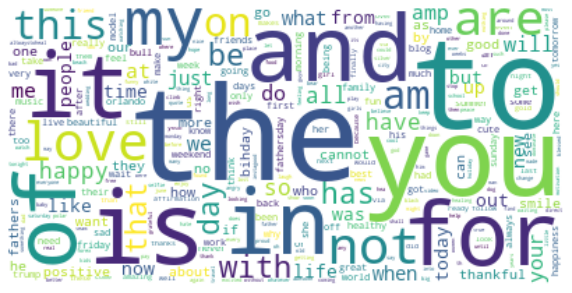

In [171]:
words = []
for line in data['clean_tweet']: 
    line_words = line.split()
    words.extend(line_words)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
    ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Задание 5

Теперь отобразим облако слов для отзывов, не содержащих токсичных комментариев (combine_df['label'] == 0).

## Задание 6

Теперь отобразим облако слов для отзывов, содержащих токсичные комментарии (combine_df['label'] == 1). 